In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

In [4]:
df = pd.read_csv('D:/ML/heart.csv')  # Load the heart disease dataset into a DataFrame

In [5]:
print(df.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [7]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [8]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
# Check if the 'id' column exists in the dataset and drop it (to remove unnecessary identifiers)
if 'id' in df.columns:  
    df.drop(columns=['id'], inplace=True)  

# Check if the 'Unnamed: 32' column exists in the dataset and drop it (likely an extra unnamed column)
if 'Unnamed: 32' in df.columns:  
    df.drop(columns=['Unnamed: 32'], inplace=True)  

In [10]:
# Separate the features (X) and target variable (y)
X = df.iloc[:, 1:]  # Select all columns except the first one as features
y = df.iloc[:, 0]   # Select the first column as the target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
# Create a K-Nearest Neighbors (KNN) classifier with k=3 (3 neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Predict the target values for the test dataset using the trained KNN model
y_pred = knn.predict(X_test)

In [13]:
# Calculate the accuracy of the model (ratio of correct predictions to total predictions)
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision (ratio of correctly predicted positive observations to total predicted positives)
# 'macro' average computes the precision for each class and then takes the average
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)

# Calculate recall (ratio of correctly predicted positive observations to all actual positives)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)

# Compute the confusion matrix (shows the number of TP, FP, TN, and FN)
cm = confusion_matrix(y_test, y_pred)

# Compute specificity (True Negative Rate): TN / (TN + FP)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])  # Ensures we correctly classify negatives

In [14]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7219512195121951
Precision: 0.7658208020050126
Recall: 0.7360856249014144
Specificity: 0.3333333333333333
Confusion Matrix:
 [[1 2 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
               precision    recall  f1-score   support

          34       1.00      0.33      0.50         3
          35       0.43      0.60      0.50         5
          37       0.00      0.00      0.00         3
          38       0.60      1.00      0.75         3
          39       1.00      0.60      0.75         5
          40       1.00      1.00      1.00         1
          41       0.33      0.50      0.40         4
          42       1.00      0.50      0.67         6
          43       0.71      1.00      0.83         5
          44       0.29      0.50      0.36         4
          45       1.00      0.60      0.75         5
          46       0.60      1.00      0.75         3
          47    

C:\Users\vishal_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vishal_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vishal_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

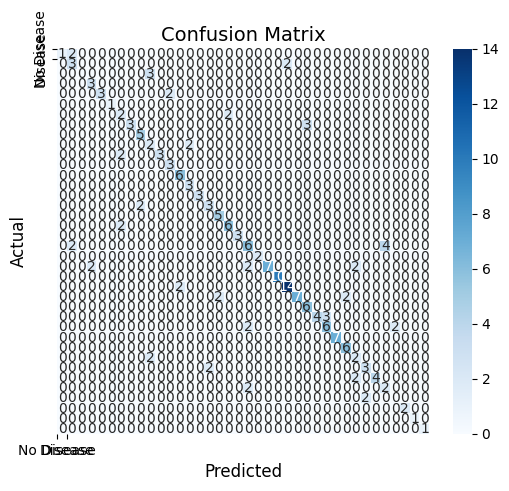

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 5))  # Set figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 10})  # Reduce text size
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["No Disease", "Disease"], rotation=0, fontsize=10)
plt.yticks(ticks=[0, 1], labels=["No Disease", "Disease"], rotation=90, fontsize=10)
plt.show()

In [18]:
scores = []  
k_range = range(1, 21)  # Testing k from 1 to 20  

for k in k_range:  
    knn = KNeighborsClassifier(n_neighbors=k)  
    knn.fit(X_train, y_train)  
    y_pred_k = knn.predict(X_test)  
    scores.append(accuracy_score(y_test, y_pred_k))  

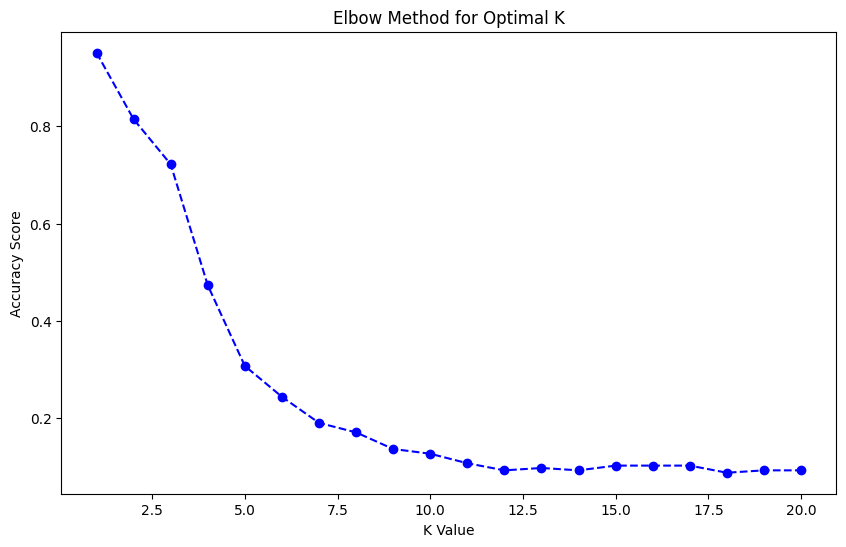

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('Elbow Method for Optimal K')
plt.show()
